# Present Day Areas

This Jupyter notebook assesses the present day areas of large igneous provinces and builds up the LIP summary table used in the manuscript.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Files

In [30]:
original = pd.read_csv('LIP_Outline.csv')
original.sort_values('AGE',inplace=True)
original.reset_index(inplace=True,drop=True)
original

,ID,Type_C_0_S,NAME_EVENT,NAME_ALT,CRUST_BLK,AGE_TEXT,NAME_PART,COMMENT,AGE_MAX,AGE_MIN,AGE_PEAK1,AGE_PEAK2,AGE,area_km2
0,0,C,SouthernAfrica999-912Ma,NaN,NaN,999-912 Ma,SouthernAfrica999-912Ma,NaN,0,0,0,0,0,1.060864e+06
1,0,C,Keonjhar Younger and Older,NaN,Singhbhum craton,0,Keonjhar Younger and Older,NaN,0,0,0,0,0,1.088726e+04
2,0,C,Ghatgaon LIP,NaN,Singhbhum craton,0,Ghatgaon LIP,NaN,0,0,0,0,0,1.173238e+04
3,0,C,SouthernAfrica830-750Ma,NaN,NaN,830-750 Ma,SouthernAfrica830-750Ma,NaN,0,0,0,0,0,3.415397e+06
4,0,C,Katanga,NaN,NaN,??800 Ma,Katanga,NaN,0,0,0,0,0,2.931763e+04
5,0,C,Belaya River,NaN,NaN,560-430 Ma,Belaya River,NaN,0,0,0,0,0,1.676628e+04
6,0,C,Cundeelee (1664-1260 Ma),NaN,YIlgarn craton,1664-1260 Ma0,NaN,NaN,0,0,0,0,0,5.411081e+04
7,0,C,Columbia River,NaN,NaN,mainly 16.5-14.5 Ma,Columbia River,NaN,0,0,0,0,16,6.764210e+05
8,0,C,Afro-Arabian,NaN,NaN,mainly 31-29 Ma,Afar,NaN,0,0,0,0,31,2.420742e+06
9,0,S,Sierra Madre Occidental (SLIP),NaN,North America,38-20 Ma,NaN,NaN,0,0,0,0,38,2.076005e+06


In [16]:
present = pd.read_csv('LIP_current_extent_all.csv')
present.sort_values('X_BARCDAGE',inplace=True)
present.reset_index(inplace=True,drop=True)
present.head()

,OBJECTID,LIPID,X_LIPNAME,X_COID,X_NAME_EVE,X_NAME_UNI,X_NAME_BOD,X_CRUST_BL,CAPT_SCALE,DESCRIPT,...,COMMENT,X_geOrigin,X_BARCDAGE,LimYng,LimOld,Shape_Leng,UQRWID,Shape_Le_1,Shape_Area,area_km2
0,14892,1646,CRBG volcanic rocks and dykes,NAM,Columbia River LIP,"COLUMBIA RIVER BASALTS, NORTH AMERICA",NaN,North America,1000000,NaN,...,"shape files downloaded 29 Sept 2014, but have ...",17.0,17.0,14.0,20.0,43.990521,0,43.990521,19.226186,238251.454
1,15188,319,Lovejoy basalt,NAM,Columbia River LIP,"LOVEJOY BASALT, CALIFORNIA, USA",NaN,westen North America,1000000,NaN,...,"shape files downloaded 29 Sept 2014, but have ...",16.0,17.0,14.0,20.0,0.143624,0,0.143624,0.001331,16.492
2,15189,319,Lovejoy basalt,NAM,Columbia River LIP,"LOVEJOY BASALT, CALIFORNIA, USA",NaN,westen North America,1000000,NaN,...,"shape files downloaded 29 Sept 2014, but have ...",16.0,17.0,14.0,20.0,0.084893,0,0.084893,0.000494,6.122
3,15246,423,Columbia River Basalts,NAM,Columbia River Flood Basalt Province,Columbia River Basalt,NaN,western North America,2000000,volcanic,...,NaN,17.0,17.0,14.0,20.0,2.946179,0,2.946179,0.247328,3064.894
4,15247,353,Oregon Plateau,NAM,Columbia River Flood Basalt Province,Oregon Plateau,NaN,western North America,2000000,volcanic,...,NaN,17.0,17.0,14.0,20.0,85.448206,0,85.448206,12.670482,157012.975


## LIPs

Start a dataframe:

In [11]:
summary = pd.DataFrame(columns=['name',
                                'type',
                                'age',
                                'age reference',
                                'original area km2',
                                'present area km2',
                                'present area reference',
                                'present/original',
                                'buried'])

Template:

### Columbia River Basalts

Present extent shapefile has data from both Buchan and Ernst (2004) as well as the PLATES database - we chose to use the Buchan and Ernst (2004) (which has present['CAPT_SCALE']==2000000) since they had more detail and included the Eastern Snake River Plain which is included in the original broad LIP outline.

In [18]:
summary.loc['CRB'] = \
    pd.Series({'name':'Columbia River',
               'type':'basaltic',
               'age':16.3,
               'age reference':'Kasbohm and Schoene (2018)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Columbia River']['area_km2']),
               'present area km2':np.sum(present[(present['X_BARCDAGE']==17)&(present['CAPT_SCALE']==2000000)]['area_km2']),
               'present area reference':'Buchan and Ernst (2004)',
               'present/original':(np.sum(present[(present['X_BARCDAGE']==17)&(present['CAPT_SCALE']==2000000)]['area_km2']))/(np.float(original[original['NAME_EVENT']=='Columbia River']['area_km2'])),
               'buried':'no'})

### Afar

The present-day extent for the Afar LIP is from the PLATES database:

Coffin, M.F., Duncan, R.A., Eldholm, O., Fitton, J.G., Frey, F.A., Larsen, H.C., Mahoney, J.J., Saunders, A.D., Schlich, R., and Wallace, P.J., 2006. Large igneous provinces and scientific ocean drilling: Status quo and a look ahead, Oceanography, vol. 19(4), pp. 150-160.

The original extent polygon extends much further north than the exposure of the Ethiopian Traps and includes the Red Sea and its flanks where there are no current exposures included in the PLATES polygons — despite there being some exposure of LIP-related volcanics along the Red Sea flanks. This portion of the LIP could be considered to be buried with the Ethiopian and Yemen plateau volcanics being exposed.

In [21]:
summary.loc['Afar'] = \
    pd.Series({'name':'Afar',
               'type':'basaltic',
               'age':30,
               'age reference':'Courtillot and Renne (2003)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Afro-Arabian']['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==30]['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==30]['area_km2']))/(np.float(original[original['NAME_EVENT']=='Afro-Arabian']['area_km2'])),
               'buried':'partial'})

### Sierra Madre

The Sierra Madre is a silic large igneous province, but along with the rhyolitic volcanics there was mafic and intermediate volcanism. The first major pulse of magmatism was 34 Ma (Bryan and Ferrari, 2013).

In [31]:
summary.loc['SMO'] = \
    pd.Series({'name':'Sierra Madre Occidental',
               'type':'silicic/bimodal',
               'age':34,
               'age reference':'Bryan and Ferrari (2013)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Sierra Madre Occidental (SLIP)']['area_km2']),
               'present area km2':np.sum(present[present['LIPID']==101]['area_km2']),
               'present area reference':'Bryan and Ferrari (2013)',
               'present/original':np.sum(present[present['LIPID']==101]['area_km2'])/np.float(original[original['NAME_EVENT']=='Sierra Madre Occidental (SLIP)']['area_km2']),
               'buried':'no'})

### NAIP (North Atlantic Volcanic Province)

The North Atlantic Volcanic Province was associated with succesful rifting. In the Ernst current extent database there were duplicates for nearly all of the polygons with ages assigned both at 62 Ma and 60 Ma. There were also abundant polygons that are within the North Atlantic and are not exposed. These duplicates and submerged polygons were removes in order to determine area. Its extent will be anomalously low due to the potential of coverage by the Greenland ice sheet including the burial of much of it due to successful rifting.

In [ ]:
summary.loc['NAIP'] = \
    pd.Series({'name':'',
               'type':'',
               'age':,
               'age reference':'',
               'original area km2':,
               'present area km2':,
               'present area reference':'',
               'present/original':
               'buried':''})

In [23]:
summary

,name,type,age,age reference,original area km2,present area km2,present area reference,present/original,buried
CRB,Columbia River,basaltic,16.3,Kasbohm and Schoene (2018),6.764210e+05,375546.077,Buchan and Ernst (2004),0.555196,no
Afar,Afar,basaltic,30.0,Courtillot and Renne (2003),2.420742e+06,631287.075,Coffin et al. (2006),0.260782,partial
SMO,Sierra Madre Occidental,silicic/bimodal,34.0,Bryan and Ferrari (2013),2.076005e+06,619620.413,Bryan and Ferrari (2013),0.298468,no


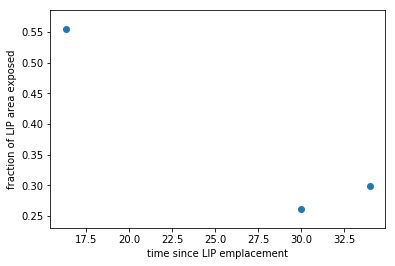

In [26]:
plt.scatter(summary['age'],summary['present/original'])
plt.ylabel('fraction of LIP area exposed')
plt.xlabel('time since LIP emplacement')
plt.show()